# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

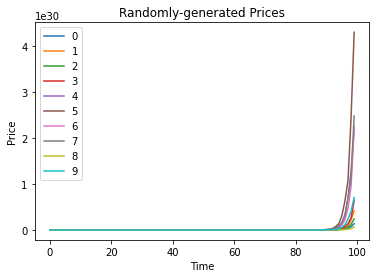

In [2]:
returns = pd.DataFrame(np.random.normal(2.0, 0.2, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [3]:
s = pd.Series([1, 2, np.nan, 4, 5, np.nan, 7]) #It does automatically states the type of data
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    NaN
6    7.0
dtype: float64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [4]:
print(s.name) 

None


This name can be directly modified with no repercussions.

In [5]:
s.name = "Dinosaurs Series"
print(s.name) 

Dinosaurs Series


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Numerical Series".

In [6]:
print(s.index) 

RangeIndex(start=0, stop=7, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [7]:
new_index = pd.date_range("2017-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [8]:
s.index = new_index
print(s.index)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [9]:
print("First element of the series: ", s.iloc[0]) 
print("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  7.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [10]:
s.iloc[:3]

2017-01-01    1.0
2017-01-02    2.0
2017-01-03    NaN
Freq: D, Name: Dinosaurs Series, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [11]:
start = 0
end = len(s)-1
step = 2

s.iloc[start:end:step]

2017-01-01    1.0
2017-01-03    NaN
2017-01-05    5.0
Freq: 2D, Name: Dinosaurs Series, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [12]:
s.iloc[::-1]

2017-01-07    7.0
2017-01-06    NaN
2017-01-05    5.0
2017-01-04    4.0
2017-01-03    NaN
2017-01-02    2.0
2017-01-01    1.0
Freq: -1D, Name: Dinosaurs Series, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [13]:
s.iloc[-2:-4:-1]

2017-01-06    NaN
2017-01-05    5.0
Freq: -1D, Name: Dinosaurs Series, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [14]:
s.loc['2017-01-01']

1.0

Or even for a range of dates!

In [15]:
s.loc['2017-01-02':'2017-01-04']

2017-01-02    2.0
2017-01-03    NaN
2017-01-04    4.0
Freq: D, Name: Dinosaurs Series, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [17]:
print(s < 5)

2017-01-01     True
2017-01-02     True
2017-01-03    False
2017-01-04     True
2017-01-05    False
2017-01-06    False
2017-01-07    False
Freq: D, Name: Dinosaurs Series, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [18]:
print(s.loc[s < 5]) 

2017-01-01    1.0
2017-01-02    2.0
2017-01-04    4.0
Name: Dinosaurs Series, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [19]:
print(s.loc[(s < 5) & (s > 1)]) 

2017-01-02    2.0
2017-01-04    4.0
Freq: 2D, Name: Dinosaurs Series, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [41]:
#symbol = "CSC"
#start = "2012-01-01"
#end = "2016-01-01"
#prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

import pandas_datareader as pdr
import datetime
symbol = "TSLA"
data = pdr.get_data_yahoo(symbol, start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
data



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000,5.450000
...,...,...,...,...,...,...
2015-12-24,46.375999,45.655998,46.112000,46.113998,3540000,46.113998
2015-12-28,46.396000,45.108002,46.298000,45.790001,9506500,45.790001
2015-12-29,47.543999,45.910000,46.012001,47.438000,12031500,47.438000


We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [59]:
prices = data['Close']
print("\n", type(prices)) 
prices.head(5) 


 <class 'pandas.core.series.Series'>


Date
2012-01-03    5.616
2012-01-04    5.542
2012-01-05    5.424
2012-01-06    5.382
2012-01-09    5.450
Name: Close, dtype: float64

As with our number example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [60]:
print('Old name: ', prices.name) 
prices.name = symbol
print('New name: ', prices.name) 

Old name:  Close
New name:  TSLA


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [61]:
print(prices.index) 

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [62]:
monthly_prices = prices.resample('M').mean()
monthly_prices.head(10)

Date
2012-01-31    5.498000
2012-02-29    6.552400
2012-03-31    7.048182
2012-04-30    6.699000
2012-05-31    6.154727
2012-06-30    6.124667
2012-07-31    6.208381
2012-08-31    5.808956
2012-09-30    5.860842
2012-10-31    5.668667
Freq: M, Name: TSLA, dtype: float64

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [63]:
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

Date
2012-01-31    5.504
2012-02-29    6.658
2012-03-31    6.998
2012-04-30    6.631
2012-05-31    6.069
2012-06-30    6.016
2012-07-31    6.246
2012-08-31    5.880
2012-09-30    5.856
2012-10-31    5.664
Freq: M, Name: TSLA, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [64]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

Date
2012-01-31    5.616
2012-02-29    5.916
2012-03-31    6.882
2012-04-30    7.316
2012-05-31    6.756
2012-06-30    5.630
2012-07-31    6.080
2012-08-31    5.250
2012-09-30    5.628
2012-10-31    5.832
Freq: M, Name: TSLA, dtype: float64

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [65]:
eastern_prices = prices.tz_localize('US/Eastern')
eastern_prices.head(10)

Date
2012-01-03 00:00:00-05:00    5.616
2012-01-04 00:00:00-05:00    5.542
2012-01-05 00:00:00-05:00    5.424
2012-01-06 00:00:00-05:00    5.382
2012-01-09 00:00:00-05:00    5.450
2012-01-10 00:00:00-05:00    5.524
2012-01-11 00:00:00-05:00    5.646
2012-01-12 00:00:00-05:00    5.650
2012-01-13 00:00:00-05:00    4.558
2012-01-17 00:00:00-05:00    5.320
Name: TSLA, dtype: float64

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [66]:
calendar_dates = pd.date_range(start='1/3/2012', end='2016/1/1', freq='D')
print(calendar_dates) 

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               '2012-01-11', '2012-01-12',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns]', length=1460, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [67]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-03    5.616
2012-01-04    5.542
2012-01-05    5.424
2012-01-06    5.382
2012-01-07    5.382
2012-01-08    5.382
2012-01-09    5.450
2012-01-10    5.524
2012-01-11    5.646
2012-01-12    5.650
2012-01-13    4.558
2012-01-14    4.558
2012-01-15    4.558
2012-01-16    4.558
2012-01-17    5.320
Freq: D, Name: TSLA, dtype: float64

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [68]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-03    5.616
2012-01-04    5.542
2012-01-05    5.424
2012-01-06    5.382
2012-01-07    5.382
2012-01-08    5.382
2012-01-09    5.450
2012-01-10    5.524
2012-01-11    5.646
2012-01-12    5.650
Freq: D, Name: TSLA, dtype: float64

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [69]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-03    5.616
2012-01-04    5.542
2012-01-05    5.424
2012-01-06    5.382
2012-01-07    5.382
2012-01-08    5.382
2012-01-09    5.450
2012-01-10    5.524
2012-01-11    5.646
2012-01-12    5.650
Freq: D, Name: TSLA, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [70]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03    5.616
2012-01-04    5.542
2012-01-05    5.424
2012-01-06    5.382
2012-01-07    5.382
2012-01-08    5.382
2012-01-09    5.450
2012-01-10    5.524
2012-01-11    5.646
2012-01-12    5.650
Freq: D, Name: TSLA, dtype: float64

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

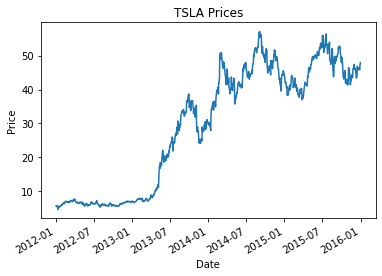

In [71]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [72]:
print("Mean: ", prices.mean())
print("Standard deviation: ", prices.std())

Mean:  29.493240587753995
Standard deviation:  17.935438351286944


In [73]:
print("Summary Statistics") 
print(prices.describe()) 

Summary Statistics
count    1006.000000
mean       29.493241
std        17.935438
min         4.558000
25%         7.017000
50%        35.629999
75%        45.421500
max        57.208000
Name: TSLA, dtype: float64


We can easily modify `Series` with scalars using our basic mathematical operators.

In [74]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

Date
2012-01-03    1.232
2012-01-04    1.084
2012-01-05    0.848
2012-01-06    0.764
2012-01-09    0.900
Name: TSLA, dtype: float64

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [75]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2012-01-03    38.480232
2012-01-04    33.515801
2012-01-05     1.591392
2012-01-06    41.122466
2012-01-09     5.744202
dtype: float64

If there are no matching indices, however, we may get an empty `Series` in return.

In [76]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00   NaN
2012-01-04 00:00:00   NaN
2012-01-05 00:00:00   NaN
2012-01-06 00:00:00   NaN
2012-01-09 00:00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [77]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

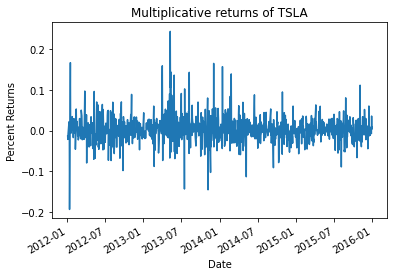

In [78]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [79]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

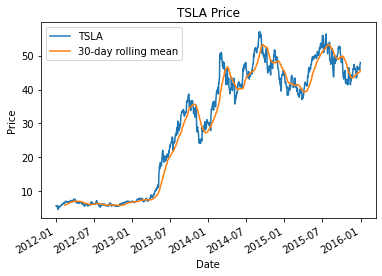

In [81]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + " Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [82]:
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

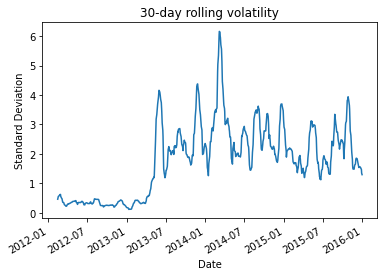

In [83]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [84]:
print(np.median(mult_returns)) 

0.001346355093928997


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [85]:
print(mult_returns.median()) 

0.001346355093928997


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [89]:
dict_data = {
    'a' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'b' : ['L', 'K', 'J', 'M', 'Z', 'A', 'Y', 'D', 'H'],
    'c' : np.random.normal(0, 1, 9)
}
print(dict_data) 

{'a': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'b': ['L', 'K', 'J', 'M', 'Z', 'A', 'Y', 'D', 'H'], 'c': array([-0.63783916,  0.14571782,  0.1341961 , -0.40923948, -0.51415754,
       -0.46064834,  0.96373237, -0.43355762, -0.32384807])}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [90]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=9))
print(frame_data) 

            a  b         c
2016-01-01  1  L -0.637839
2016-01-02  2  K  0.145718
2016-01-03  3  J  0.134196
2016-01-04  4  M -0.409239
2016-01-05  5  Z -0.514158
2016-01-06  6  A -0.460648
2016-01-07  7  Y  0.963732
2016-01-08  8  D -0.433558
2016-01-09  9  H -0.323848


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [91]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers) 

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [93]:
print(numbers.columns) 

Index(['Evens', 'Odds'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [94]:
numbers.columns = ['Shmevens', 'Shmodds']
print(numbers) 

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [95]:
print(numbers.index) 

RangeIndex(start=0, stop=5, step=1)


In [96]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print(numbers) 

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [97]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

This returns a NumPy array.

In [98]:
type (numbers.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [134]:
symbol = ['GME', 'MSFT', 'SHAK', 'AAPL']
data = pdr.get_data_yahoo(symbol, start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
prices = data['Close']
if isinstance(symbol, list):
    prices.columns = map(lambda x: x , prices.columns)
else:
    prices.name = symbol

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [135]:
prices.MSFT.head()

Date
2012-01-03    26.770000
2012-01-04    27.400000
2012-01-05    27.680000
2012-01-06    28.110001
2012-01-09    27.740000
Name: MSFT, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [129]:
prices.loc[:, 'AAPL'].head()

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
Name: AAPL, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [103]:
print(type (prices.GME)) 
print(type (prices.loc[:, 'GME'])) 

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [104]:
prices.loc[:, ['GME', 'MSFT']].head()

,GME,MSFT
Date,,
2012-01-03,23.790001,26.770000
2012-01-04,24.129999,27.400000
2012-01-05,25.260000,27.680000
2012-01-06,24.870001,28.110001
2012-01-09,23.990000,27.740000


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [136]:
prices.loc['2015-12-15':'2015-12-22']

,GME,MSFT,SHAK,AAPL
Date,,,,
2015-12-15,30.540001,55.200001,41.580002,27.622499
2015-12-16,30.559999,56.130001,40.169998,27.834999
2015-12-17,29.049999,55.700001,38.540001,27.245001
2015-12-18,28.760000,54.130001,39.750000,26.507500
2015-12-21,28.750000,54.830002,38.189999,26.832500
2015-12-22,28.600000,55.349998,39.750000,26.807501


This plays nicely with lists of columns, too.

In [106]:
prices.loc['2015-12-15':'2015-12-22', ['GME', 'MSFT']]

,GME,MSFT
Date,,
2015-12-15,30.540001,55.200001
2015-12-16,30.559999,56.130001
2015-12-17,29.049999,55.700001
2015-12-18,28.760000,54.130001
2015-12-21,28.750000,54.830002
2015-12-22,28.600000,55.349998


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [131]:
prices.iloc[0:2, 1]

Date
2012-01-03    26.77
2012-01-04    27.40
Name: MSFT, dtype: float64

In [108]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
#prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)
prices.iloc[range(7, 100, 2) , [0, 3]].head(20)

,GME,AAPL
Date,,
2012-01-12,24.180000,15.049643
2012-01-17,23.230000,15.167857
2012-01-19,24.840000,15.276786
2012-01-23,24.760000,15.264643
2012-01-25,25.000000,15.952143
2012-01-27,24.320000,15.974286
2012-01-31,23.360001,16.302856
2012-02-02,23.270000,16.254286
2012-02-06,23.410000,16.570356


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [137]:
prices.loc[prices.GME > prices.AAPL].head()

,GME,MSFT,SHAK,AAPL
Date,,,,
2012-01-03,23.790001,26.770000,NaN,14.686786
2012-01-04,24.129999,27.400000,NaN,14.765714
2012-01-05,25.260000,27.680000,NaN,14.929643
2012-01-06,24.870001,28.110001,NaN,15.085714
2012-01-09,23.990000,27.740000,NaN,15.061786


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [138]:
prices.loc[(prices.GME > prices.AAPL) & ~prices.SHAK.isnull()].head()

,GME,MSFT,SHAK,AAPL
Date,,,,
2015-01-30,35.250000,40.400002,45.900002,29.290001
2015-02-02,36.830002,41.279999,43.990002,29.657499
2015-02-03,37.500000,41.599998,44.980000,29.662500
2015-02-04,36.630001,41.840000,41.320000,29.889999
2015-02-05,36.700001,42.450001,42.639999,29.985001


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [139]:
data = pdr.get_data_yahoo('TSLA', start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
s_1 = data['High']
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

,GME,MSFT,SHAK,AAPL,TSLA
Date,,,,,
2012-01-03,23.790001,26.770000,NaN,14.686786,5.900
2012-01-04,24.129999,27.400000,NaN,14.765714,5.734
2012-01-05,25.260000,27.680000,NaN,14.929643,5.586
2012-01-06,24.870001,28.110001,NaN,15.085714,5.558
2012-01-09,23.990000,27.740000,NaN,15.061786,5.498


It is also just as easy to remove a column.

In [140]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,GME,MSFT,SHAK,AAPL
Date,,,,
2012-01-03,23.790001,26.770000,NaN,14.686786
2012-01-04,24.129999,27.400000,NaN,14.765714
2012-01-05,25.260000,27.680000,NaN,14.929643
2012-01-06,24.870001,28.110001,NaN,15.085714
2012-01-09,23.990000,27.740000,NaN,15.061786


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [141]:
data_1 = pdr.get_data_yahoo(['SPY', 'XOM'], start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
df_1 = data_1['High']
data_2 = pdr.get_data_yahoo(['GOOG', 'AAPL'], start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
df_2 = data_2['High']
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

Symbols,SPY,XOM,GOOG,AAPL
Date,,,,
2012-01-03,128.380005,86.669998,332.827484,14.732143
2012-01-04,127.809998,86.150002,333.873566,14.810000
2012-01-05,128.229996,85.949997,330.745270,14.948214
2012-01-06,128.220001,86.000000,328.767700,15.098214
2012-01-09,128.179993,85.639999,322.291962,15.276786


#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [142]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,GME,MSFT,SHAK,AAPL
Date,,,,
2012-01-03,23.790001,26.770000,0.0,14.686786
2012-01-04,24.129999,27.400000,0.0,14.765714
2012-01-05,25.260000,27.680000,0.0,14.929643
2012-01-06,24.870001,28.110001,0.0,15.085714
2012-01-09,23.990000,27.740000,0.0,15.061786


In [143]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,GME,MSFT,SHAK,AAPL
Date,,,,
2012-01-03,23.790001,26.770000,45.900002,14.686786
2012-01-04,24.129999,27.400000,45.900002,14.765714
2012-01-05,25.260000,27.680000,45.900002,14.929643
2012-01-06,24.870001,28.110001,45.900002,15.085714
2012-01-09,23.990000,27.740000,45.900002,15.061786


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [144]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,GME,MSFT,SHAK,AAPL
Date,,,,
2015-01-30,35.250000,40.400002,45.900002,29.290001
2015-02-02,36.830002,41.279999,43.990002,29.657499
2015-02-03,37.500000,41.599998,44.980000,29.662500
2015-02-04,36.630001,41.840000,41.320000,29.889999
2015-02-05,36.700001,42.450001,42.639999,29.985001


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

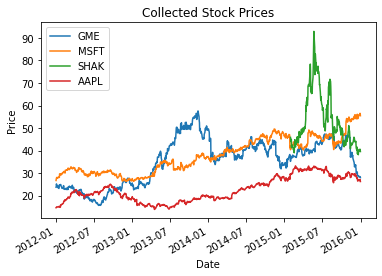

In [145]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [146]:
prices.mean(axis=0)

GME     35.539433
MSFT    37.886163
SHAK    53.575708
AAPL    22.636390
dtype: float64

As well as the standard deviation:

In [147]:
prices.std(axis=0)

GME     10.121687
MSFT     7.767372
SHAK    11.968587
AAPL     5.368376
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [148]:
prices.describe()

,GME,MSFT,SHAK,AAPL
count,1006.000000,1006.000000,233.000000,1006.000000
mean,35.539433,37.886163,53.575708,22.636390
std,10.121687,7.767372,11.968587,5.368376
min,15.730000,26.370001,38.189999,13.947500
25%,24.917500,30.745000,44.119999,18.540000
50%,37.754999,37.255001,49.270000,21.550535
75%,43.015000,44.400002,61.669998,27.515625
max,57.590000,56.549999,92.860001,33.250000


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [149]:
(2 * prices - 50).head(5)

,GME,MSFT,SHAK,AAPL
Date,,,,
2012-01-03,-2.419998,3.540001,NaN,-20.626429
2012-01-04,-1.740002,4.799999,NaN,-20.468573
2012-01-05,0.520000,5.360001,NaN,-20.140715
2012-01-06,-0.259998,6.220001,NaN,-19.828571
2012-01-09,-2.020000,5.480000,NaN,-19.876429


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [150]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,GME,MSFT,SHAK,AAPL
Date,,,,
2012-01-04,0.014292,0.023534,NaN,0.005374
2012-01-05,0.046830,0.010219,NaN,0.011102
2012-01-06,-0.015439,0.015535,NaN,0.010454
2012-01-09,-0.035384,-0.013163,NaN,-0.001586
2012-01-10,0.010004,0.003605,NaN,0.003580


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

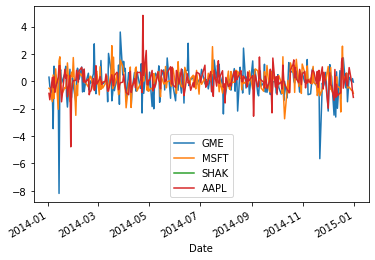

In [151]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [152]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

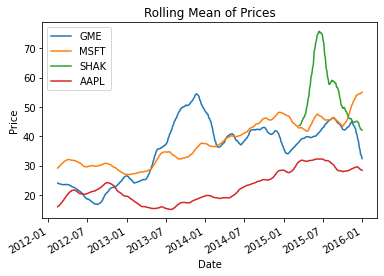

In [153]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*